In [4]:
!pip install tqdm

In [1]:
import pandas as pd

from util.performance import plot_moderation_performance
from tqdm import tqdm
from kneed import DataGenerator, KneeLocator

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\Andersen\AppData\Local\Temp\ipykernel_10884\2944310310.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [12]:
# load df
names = ['BERT_BL', 'BERT_MCD', 'BERT_EN']
label = ['DistilBERT-BL', 'DistilBERT-MCD', 'DistilBERT-EN']
colours = ['b', 'r', 'g']

dfs_all = []
for name in names:
    dfs = []
    for i in range(5):
        df = pd.read_pickle(f"../pickle/toxic/df_{name}_{i}.pkl")
        dfs.append(df)
        i = i+1
    dfs_all.append(dfs)

In [3]:
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

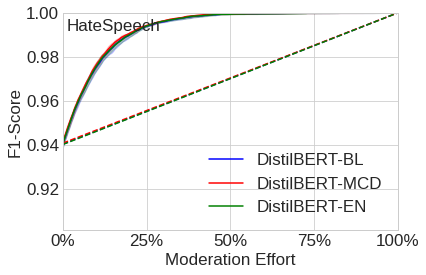

In [4]:
for i in range(len(dfs_all)):
    plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro')
    
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1 , 2]
plt.legend([handles[idx] for idx in order],[label[idx] for idx in order], loc='lower right')



plt.xticks([0, .25, .50, .75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.yticks([0.88, .9, .92, .94, .96, .98, 1], ['0.88', '0.90', '0.92', '0.94', '0.96', '0.98', '1.00'])

plt.xlim((0, 1))
plt.ylim((0.901, 1))

plt.xlabel('Moderation Effort')
plt.ylabel('F1-Score')
plt.text(0.01, .692, 'HateSpeech')

plt.savefig('bert_toxic_y.pdf', bbox_inches='tight')

100%|██████████| 3/3 [00:00<00:00, 24.93it/s]



BERT_BL
Effort (%):  0.245
F1_Score  :  0.9936399999999999

BERT_MCD
Effort (%):  0.239
F1_Score  :  0.99372

BERT_EN
Effort (%):  0.245
F1_Score  :  0.9937000000000001


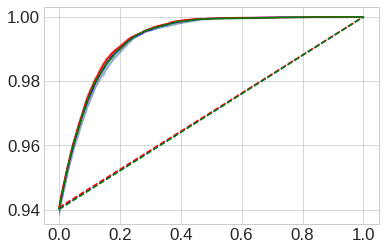

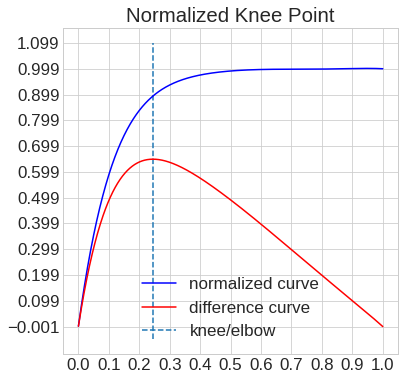

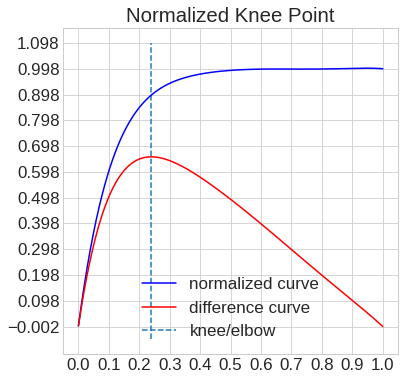

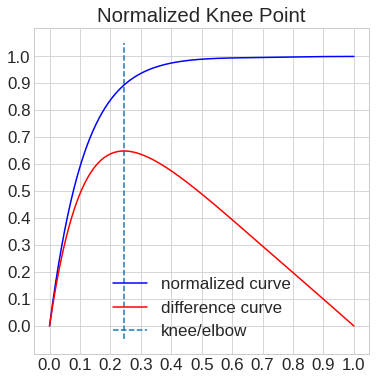

In [5]:
# Knee LC

values = []

for i in tqdm(range(len(dfs_all))):
    a, b = plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro', eps=1000)
    values.append((a, b))

i = 0
for (a, b) in tqdm(values):
    x = a
    y = b.values
    kneedle = KneeLocator(x, y, S=1, curve='concave', direction='increasing', interp_method="polynomial")
    
    print('\n' + names[i])
    print('Effort (%): ', round(kneedle.knee, 3))
    print('F1_Score  : ', y[int(kneedle.knee*1000)])
    kneedle.plot_knee_normalized()
    i+= 1

C:\Users\Andersen\AppData\Local\Temp\ipykernel_10884\3046348383.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


5it [00:15,  3.09s/it]


0.01:  46.9
0.05:  41.5
0.1:  35.1
0.15:  29.4
0.2:  24.9
0.5:  11.9


5it [00:15,  3.10s/it]


0.01:  50.5
0.05:  42.0
0.1:  35.6
0.15:  30.0
0.2:  25.0
0.5:  11.8


5it [00:15,  3.10s/it]


0.01:  49.1
0.05:  42.2
0.1:  35.6
0.15:  29.7
0.2:  25.0
0.5:  11.9


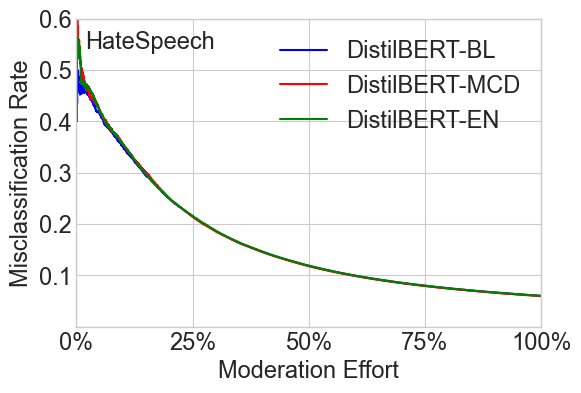

In [51]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

for idx, v in enumerate(names):
    
    data = []
    dfs = dfs_all[idx]
    
    mean = None
    mean_rng = None

    def ratio(array):
        true_counts = [sum(array[:i+1]) for i in range(len(array))]
        true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
        data.append(true_percentages)
        mean = np.array(data).mean(axis=0)
        return mean

    for i, df in tqdm.tqdm(enumerate(dfs)):
        boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
        mean = ratio(boolean_array)
        
        
    for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
        print(f"{i}: ", round(mean[int(len(df) * i)], 1))

    plt.plot(np.linspace(0, 100, len(dfs[0])), mean / 100, color=colours[idx], label=label[idx],)

    
# Diagramm anzeigen
plt.yticks([.10, .20, .30, .40, .50, .60]) 

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel('Moderation Effort')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.xlim(0, 100)
plt.xticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.ylim(0, 0.6)
plt.text(2, .542, 'HateSpeech')
plt.savefig('bert_toxic_eff.pdf', bbox_inches='tight')

plt.show()

In [36]:
len(mean)

10000

In [42]:
np.linspace(0, 100, len(dfs[0]))

array([0.00000000e+00, 1.00010001e-02, 2.00020002e-02, ...,
       9.99799980e+01, 9.99899990e+01, 1.00000000e+02])

In [39]:
len(dfs[0])

10000